In [45]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import statsmodels.api as sm
from patsy import dmatrices

Populating the interactive namespace from numpy and matplotlib


In [58]:
vc = pd.read_csv('VC data.csv', dtype=unicode)

import re
def amount(n):
    if type(n)==float:
        return 0
    else:
        return re.sub(',','',n)

vc['raised_amount_usd'] = vc['raised_amount_usd'].map(amount)
vc['raised_amount_usd'] = pd.to_numeric(vc['raised_amount_usd'], errors = 'coerce')
vc['funded_year'] = pd.to_numeric(vc['funded_year'], errors = 'coerce')
vc = vc[vc['funded_year'] > 2004]

def year(n):
    if type(n)==float:
        return int(n)
    
vc['funded_year'] = vc['funded_year'].map(year)    
    
len(vc)
vc[:10]


,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/myandb,Myandb,|Music|,Music,KOR,NaN,Seoul,Seoul,NaN,NaN,...,NaN,NaN,/funding-round/44e67390e03dde5358c65c353318bc20,undisclosed,NaN,2013-05-31 00:00:00,2013-05,2013-Q2,2013,30968.0
2,/organization/weatlas,Weatlas,|Online Reservations|Travel|Curated Web|,Curated Web,RUS,NaN,Moscow,Moscow,NaN,NaN,...,NaN,NaN,/funding-round/30dd0516a92121d56f0066ce21852a03,seed,NaN,2014-08-06 00:00:00,2014-08,2014-Q3,2014,600000.0
3,/organization/crowdzu,Crowdzu,|Video|Fashion|Music|Photography|Design|Market...,Fashion,USA,NY,New York City,New York,NaN,NaN,...,NaN,NaN,/funding-round/844c7d9fcf46a6c7b0098835b321866e,seed,NaN,2013-11-18 00:00:00,2013-11,2013-Q4,2013,35000.0
4,/organization/liv-blends,LivBlends,|Health and Wellness|,Health and Wellness,USA,CA,SF Bay Area,San Francisco,NaN,NaN,...,NaN,NaN,/funding-round/becc766c1087d5449d549931e416f1ba,seed,NaN,2014-05-28 00:00:00,2014-05,2014-Q2,2014,745000.0
5,/organization/wave-telecom,Wave Telecom,|Wireless|Advertising|Mobile|,Advertising,DOM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,/funding-round/c423b8a3e967e123588202a755f9e798,venture,A,2013-12-31 00:00:00,2013-12,2013-Q4,2013,0.0
6,/organization/ziprecruiter,ZipRecruiter,|Social Recruiting|Recruiting|Human Resources|...,Social Recruiting,USA,CA,Los Angeles,Santa Monica,NaN,NaN,...,NaN,NaN,/funding-round/862ea5fd748427393150f08c48a5414d,venture,A,2014-08-26 00:00:00,2014-08,2014-Q3,2014,63000000.0
7,/organization/leevia,Leevia,|Social Activists|Charity|Photography|Photo Sh...,NaN,ITA,NaN,Trento,Trento,NaN,NaN,...,NaN,NaN,/funding-round/e63e91cbb818929f490c8c4290a0cf09,grant,NaN,2014-02-01 00:00:00,2014-02,2014-Q1,2014,202658.0
8,/organization/nitropcr,NitroPCR,|Mobile Health|Health Care Information Technol...,Health Care Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,/funding-round/a2c6487f75dbea89e32e3a5b4e55b81b,seed,NaN,2013-03-01 00:00:00,2013-03,2013-Q1,2013,95000.0
9,/organization/copatient,CoPatient,|Heathcare|Enterprise Software|,Enterprise Software,USA,OR,"Portland, ME",Portland,/organization/406-ventures,.406 Ventures,...,Boston,Boston,/funding-round/2c1aa2ba3d255e2a4bf9247cb4108f64,venture,A,2014-06-25 00:00:00,2014-06,2014-Q2,2014,3600000.0
10,/organization/onapsis,Onapsis Inc.,|Security|,Security,USA,MA,Boston,Cambridge,/organization/406-ventures,.406 Ventures,...,Boston,Boston,/funding-round/091ada59af554599502ea84f7b0830d4,venture,NaN,2014-06-17 00:00:00,2014-06,2014-Q2,2014,9600000.0


In [ ]:
#which country has most companies that attracts VC fund
ax1 = vc.groupby(['company_country_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color="lightskyblue", title = "Number of Investment per Country", legend=False)
ax1.set(xlabel="country", ylabel="number of investment")
plt.savefig('company_num_investment.png', bbox_inches = 'tight')

ax2 = vc.groupby(['company_country_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color ="lightskyblue",title="Raised Amount per Country",legend=False)
ax2.set(xlabel="country", ylabel="raised amount")
plt.savefig('company_amount_raised.png', bbox_inches = 'tight')

#which country besides US has most companies that attracts VC fund
mask_nonUSA = vc['company_country_code'] != "USA"
ax3 = vc[mask_nonUSA].groupby(['company_country_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title="Number of Investment per Country(non-US)",legend=False)
ax3.set(xlabel="country", ylabel="number of investment")
plt.savefig('company_num_investment_nonUS.png', bbox_inches = 'tight')

ax4 = vc[mask_nonUSA].groupby(['company_country_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title="Raised Amount per Country(non-US)",legend=False)
ax4.set(xlabel="country", ylabel="raised amount")
plt.savefig('company_amount_raised_nonUS.png', bbox_inches = 'tight')

#VC distribution within US
mask_USA = vc['company_country_code'] == "USA"
ax5=vc[mask_USA].groupby(['company_state_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title="Number of Investment per State in US",legend=False)
ax5.set(xlabel="country", ylabel="number of investment")
plt.savefig('company_num_investment_US.png', bbox_inches = 'tight')

ax6 = vc[mask_USA].groupby(['company_state_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title="Raised Amount per State in US",legend=False)
ax6.set(xlabel="country", ylabel="raised amount")
plt.savefig('company_amount_raised_US.png', bbox_inches = 'tight')

In [ ]:
#investor country info
ax7 = vc.groupby(['investor_country_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Number of Investment per Country-Investor Distribution",legend=False)
ax7.set(xlabel="country", ylabel="number of investment")
plt.savefig('investor_num_investment.png', bbox_inches = 'tight')

ax8 = vc.groupby(['investor_country_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Amount Invested per Country",legend=False)
ax8.set(xlabel="country", ylabel="amount invested")
plt.savefig('investor_amount.png', bbox_inches = 'tight')

#VC investor distribution without US
mask_nonUSA2 = vc['investor_country_code'] != "USA"
ax9 = vc[mask_nonUSA2].groupby(['investor_country_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Number of Investment per Country-Investor Distribution(non-US)",legend=False)
ax9.set(xlabel="country", ylabel="number of investment")
plt.savefig('investor_num_investment(nonUS).png', bbox_inches = 'tight')

ax10 = vc[mask_nonUSA2].groupby(['investor_country_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Amount Invested per Country(non-US)",legend=False)
ax10.set(xlabel="country", ylabel="amount invested")
plt.savefig('investor_amount(nonUS).png', bbox_inches = 'tight')

#VC investor distribution within US
mask_USA2 = vc['investor_country_code'] == "USA"
ax11 = vc[mask_USA2].groupby(['investor_state_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Number of Investment per State-Investor Distribution(US)",legend=False)
ax11.set(xlabel="state", ylabel="number of investment")
plt.savefig('investor_num_investment(US).png', bbox_inches = 'tight')

ax12 = vc[mask_USA2].groupby(['investor_state_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Amount Raised per State(US)",legend=False)
ax12.set(xlabel="state", ylabel="number of investment")
plt.savefig('investor_amount(US).png', bbox_inches = 'tight')


In [ ]:
#which industry has attracted most VC fund on average
 
ax13 = vc.groupby(['company_market'])[['raised_amount_usd']].mean().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Average Investment Amount-Top 10 Industries",legend=False)
ax13.set(xlabel="industry", ylabel="average amount of investment")
plt.savefig('avg_investment_industry.png', bbox_inches = 'tight')

##which industry has attracted most VC fund in terms of total funding
ax14 = vc.groupby(['company_market'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Total Investment Amount-Top 10 Industries",legend=False)
ax14.set(xlabel="industry", ylabel="total amount of investment")
plt.savefig('total_investment_industry.png', bbox_inches = 'tight')

#mask_nonoil = vc['company_market'] != "Oil and Gas"
#vc[mask_nonoil].groupby(['company_market'])[['raised_amount_usd']].mean().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar')
#vc[mask_nonoil].groupby(['company_market'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar')

#in terms of number of investment
ax15 = vc.groupby(['company_market'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Number of Investment-Top 10 Industries",legend=False)
ax15.set(xlabel="industry", ylabel="number of investment")
plt.savefig('number_of_investment_industry.png', bbox_inches = 'tight')

C:\Users\rache\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\rache\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


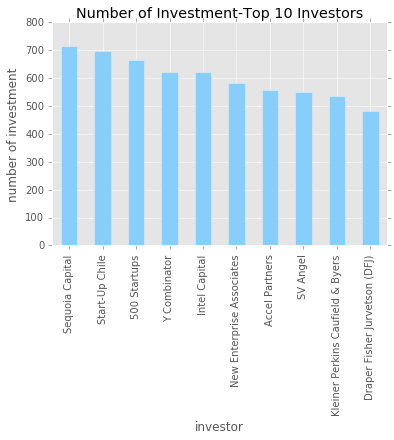

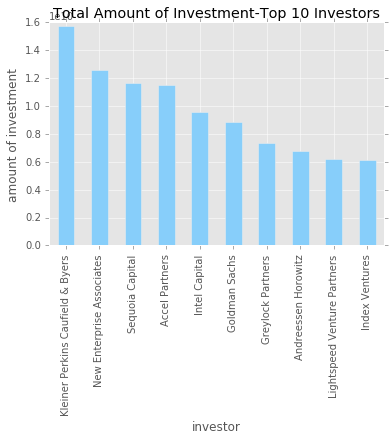

In [47]:
# Make funding_round_code all uppercase & Pull in funding_round_type for all blanks
vc['funding_round_code'] = vc['funding_round_code'].str.upper()
vc['funding_round_code'] = vc['funding_round_code'].fillna('') 
vc['funding_round_code'] = np.where(vc['funding_round_code'] == '',vc['funding_round_type'],vc['funding_round_code'])

#leading investors in terms of total investment
ax16 = vc.groupby(['investor_name'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Number of Investment-Top 10 Investors",legend=False)
ax16.set(xlabel="investor", ylabel="number of investment")
plt.savefig('number_of_investment_investor.png', bbox_inches = 'tight')

ax17 = vc.groupby(['investor_name'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Total Amount of Investment-Top 10 Investors",legend=False)
ax17.set(xlabel="investor", ylabel="amount of investment")
plt.savefig('amount_of_investment_investor.png', bbox_inches = 'tight')


In [ ]:
def round(n):
    
    if n == "A":
        return True
    else:
        if n == "B":
            return True
        else:
            if n == "C":
                return True
            else: 
                if n == "angel":
                    return True
                else:
                    if n == "seed":
                        return True
                    else:
                        return False
        
mask_early = vc['funding_round_code'].map(round)
vc_early = vc[mask_early]
ax18 = vc_early.groupby(['investor_name'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Early Round Number of Investment-Top 10 Investors",legend=False)
ax18.set(xlabel="investor", ylabel="number of investment")
plt.savefig('ER_number_of_investment_investor.png', bbox_inches = 'tight')

ax19 = vc_early.groupby(['investor_name'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Early Round Amount of Investment-Top 10 Investors",legend=False)
ax19.set(xlabel="investor", ylabel="amount of investment")
plt.savefig('ER_amount_of_investment_investor.png', bbox_inches = 'tight')

ax20 = vc_early.groupby(['funding_round_code'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Early Round Number of Investment Distribution",legend=False)
ax20.set(xlabel="round_code", ylabel="number of investment")
plt.savefig('ER_number_of_investment_roundcode.png', bbox_inches = 'tight')

ax21 = vc_early.groupby(['funding_round_code'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Early Round Amount of Investment Distribution",legend=False)
ax21.set(xlabel="round_code", ylabel="amount of investment")
plt.savefig('ER_amount_of_investment_roundcode.png', bbox_inches = 'tight')

#vc_early.groupby(['funding_round_code','investor_name'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar')

#seed round investment
mask_seed = vc['funding_round_code'] == "seed"
vc_seed = vc[mask_seed]
ax22 = vc_seed.groupby(['investor_name'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Seed Round Number of Investment-Top 10 Investors",legend=False)
ax22.set(xlabel="investor", ylabel="number of investment")
plt.savefig('Seed_number_of_investment_investor.png', bbox_inches = 'tight')

ax23 = vc_seed.groupby(['investor_name'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "Seed Round Amount of Investment-Top 10 Investors",legend=False)
ax23.set(xlabel="investor", ylabel="number of investment")
plt.savefig('Seed_amount_of_investment_investor.png', bbox_inches = 'tight')

#c round investment
mask_C = vc['funding_round_code'] == "C"
vc_C = vc[mask_C]

ax24 = vc_C.groupby(['investor_name'])[['raised_amount_usd']].count().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "C Round Number of Investment-Top 10 Investors",legend=False)
ax24.set(xlabel="investor", ylabel="number of investment")
plt.savefig('C_number_of_investment_investor.png', bbox_inches = 'tight')

ax25 = vc_C.groupby(['investor_name'])[['raised_amount_usd']].sum().sort('raised_amount_usd',ascending=False)[:10].plot(kind='bar',color = "lightskyblue",title = "C Round Amount of Investment-Top 10 Investors",legend=False)
ax25.set(xlabel="investor", ylabel="number of investment")
plt.savefig('C_amount_of_investment_investor.png', bbox_inches = 'tight')


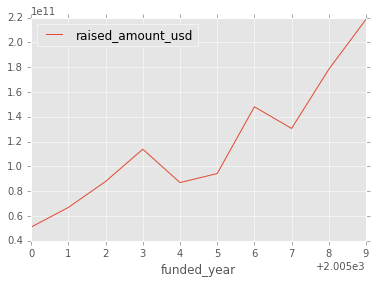

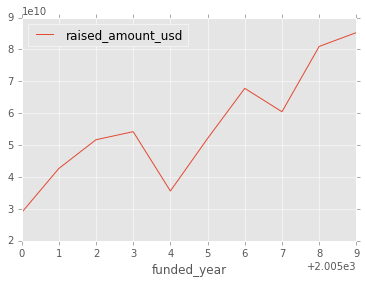

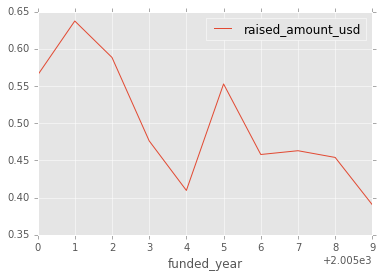

In [55]:
#funded year time-series

#overall
vc.groupby(['funded_year'])[['raised_amount_usd']].sum().plot()

#early_round
vc_early.groupby(['funded_year'])[['raised_amount_usd']].sum().plot()

#early_round_percentage
early_percentage = vc_early.groupby(['funded_year'])[['raised_amount_usd']].sum()/vc.groupby(['funded_year'])[['raised_amount_usd']].sum()
early_percentage.plot()


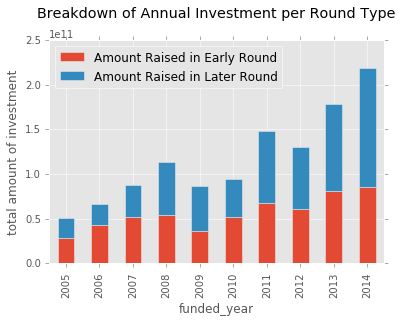

In [71]:
import matplotlib
matplotlib.style.use('ggplot')

df = vc.groupby(['funded_year'])[['raised_amount_usd']].sum()
df['Amount Raised in Early Round'] = vc_early.groupby(['funded_year'])[['raised_amount_usd']].sum()
df=df.rename(columns = {'raised_amount_usd':'Total Amount Raised'})
df['Amount Raised in Later Round'] = df['Total Amount Raised'] - df['Amount Raised in Early Round']
df_2 = pd.DataFrame(df['Amount Raised in Early Round'])
df_2['Amount Raised in Later Round'] = df['Amount Raised in Later Round']
df_2

ax26 = df_2.plot.bar(stacked=True)
ax26.set(ylabel="total amount of investment")
plt.title("Breakdown of Annual Investment per Round Type", y=1.08)
plt.savefig('total_amount_time_series.png', bbox_inches = 'tight')

#df = pd.DataFrame(overall)
#df["early"] = vc_early.groupby(['funded_year'])[['raised_amount_usd']].sum()
#df[:10]
#df.plot.bar(stacked=True)


In [ ]:
#whether funding also has seasonality

def seasonal(n):
    return n[-2:]

vc['quarter_only'] = vc['funded_quarter'].map(seasonal)

vc.groupby(['funded_quarter'])[['raised_amount_usd']].sum().plot()
vc.groupby(['quarter_only'])[['raised_amount_usd']].mean().plot()
